In [1]:
from diffusion_gibbs import DiffusionGibbs
import numpy as np
import mpmath as mp

In [4]:
data_=np.load('./data/data_new.npy')
data=data_[:,:-1]
true_labels=data_[:,-1]
sampler=DiffusionGibbs(data, alpha=[1,2,1.5,1], hot_start=0, n_iter=10, n_clusters_0=4)


In [47]:
sampler.init_params(0)
sampler.n_iter=15
n_gibbs_iter=150
dictionary2, _, _, _, _, _ = sampler.compute_evidence(n_chains=10, n_gibbs_iter=n_gibbs_iter)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:56<00:00,  3.77s/it]
/home/matteo/Courses/Trotterellino/diffusion_gibbs.py:41: RuntimeWarning: divide by zero encountered in scalar floor_divide
  blocked_chain=np.add.reduceat(timeserie, np.arange(0, len(timeserie)//i*i, i))/i
/home/matteo/Courses/Trotterellino/diffusion_gibbs.py:41: RuntimeWarning: invalid value encountered in scalar divide
  blocked_chain=np.add.reduceat(timeserie, np.arange(0, len(timeserie)//i*i, i))/i


The block analysis did not converge
Using the arithmetic mean method we get the following results: 1.46229096189443e-8692 0 -20013.6896239464 0 0 0
Using the harmonic mean method we get the following results: 5.0079659014329e-1498 6.26969946558669e-2996 -3447.66143948012 -6896.70921018879 4.01803410953756e+1497 1.63418492715852e+2995 3448.36067696763 6896.73349768172
The block analysis did not converge
Using thermodynamic integration we get the following results: (mpf('-inf'), mpf('1.5542683544344273'))
The block analysis did not converge
Using the stepping stone method we get the following results: (mpf('7.8930062788350974e-1398'), mpf('2.2630158367244655e-2794')) (mpf('-3216.9479829194561'), mpf('-6432.6060514606261'))


In [68]:
        from diffusion_gibbs import arithmethic_average_error, harmonic_mean_blockerror, th_integration_error, stepping_stone_error
        burnin=200
        betas=np.linspace(0,1,10)**(1/0.3)

        log_z_avgs=[]
        log_z_hmeans=[]
        log_z_thints=[]
        log_z_stones=[]

        for t_max in np.linspace(burnin+50, n_gibbs_iter*sampler.n_iter, 7, dtype=int):
            dictionary={}
            for i in betas:
                dictionary['loglikelihood_%.7f'%i]=np.array(dictionary2['loglikelihood_%.7f'%i])[:t_max]
                dictionary['loglikelihood_%.7f'%i]=dictionary['loglikelihood_%.7f'%i][dictionary['loglikelihood_%.7f'%i]!=-np.inf]
            
            if 0 in betas:
                (z_avg, z_avg_error), (log_z_avg, log_z_avg_error), (var_z_avg, log_var_zavg) = arithmethic_average_error(dictionary['loglikelihood_%.7f'%0][burnin:])
            print('Using the arithmetic mean method we get the following results:', z_avg, z_avg_error, log_z_avg, log_z_avg_error, var_z_avg, log_var_zavg)
            
            if 1 in betas:
                (z_hmean, z_hmean_var), (log_zhm, log_zhm_var), (rho, var_rho), (log_rho, log_var_rho) = harmonic_mean_blockerror(dictionary['loglikelihood_%.7f'%1][burnin:])
            print('Using the harmonic mean method we get the following results:', z_hmean, z_hmean_var, log_zhm, log_zhm_var, rho, var_rho, log_rho, log_var_rho)

            thermodynamic_averages = []
            thermodynamic_averages_error = []
            for i in betas:
                (z__,z__std), (log_z, log_z_std), (z__var, log_z_var)=arithmethic_average_error(dictionary['loglikelihood_%.7f'%i][burnin:], log_avg=True)
                thermodynamic_averages.append(z__)
                thermodynamic_averages_error.append(z__var)
            th_int_res = th_integration_error(thermodynamic_averages, thermodynamic_averages_error, betas)
            print('Using thermodynamic integration we get the following results:', th_int_res)

            r_k=[]
            var_rk=[]
            for i in range(1,len(betas)):
                (z_rk,z__std_rk), (log_z_rk, log_z_std_rk), (z__var_rk, log_z_var_rk)=arithmethic_average_error(dictionary['loglikelihood_%.7f'%betas[i-1]][burnin:]*(betas[i]-betas[i-1]))
                r_k.append(z_rk)
                var_rk.append(z__var_rk)
            r_k=np.array(r_k)
            var_rk=np.array(var_rk)
            stepping_stone_res, log_stepping_stone = stepping_stone_error(r_k, var_rk)
            print('Using the stepping stone method we get the following results:', stepping_stone_res, log_stepping_stone)

            log_z_avgs.append(log_z_avg)
            log_z_hmeans.append(log_zhm)
            log_z_thints.append(th_int_res[0])
            log_z_stones.append(log_stepping_stone[0] )


Using the arithmetic mean method we get the following results: 2.61913269447065e-9707 2.6614410526284e-9707 -22350.2306544629 -22350.214629968 7.00987267034755e-19414 -44700.4396758495
Using the harmonic mean method we get the following results: 3.6897392235386e-753 3.40222057595377e-1506 -1732.54101924009 -3466.46872172002 5.31562332376029e+752 2.71630954759569e+1505 1733.21464021278 3466.38983913111
Using thermodynamic integration we get the following results: (mpf('-3029.1163807949297'), mpf('8.364901547203317'))
Using the stepping stone method we get the following results: (mpf('6.0149175091561995e-1420'), mpf('9.2307454045952119e-2838')) (mpf('-3267.8765894164007'), mpf('-6532.5139541129529'))
Using the arithmetic mean method we get the following results: 1.64035166457552e-9376 1.65916247675311e-9376 -21588.5429212637 -21588.5315189692 2.7491812392496e-18752 -43177.0643606882
Using the harmonic mean method we get the following results: 2.17425219172383e-752 1.16046586256224e-1504 

In [67]:
import matplotlib.pyplot as plt

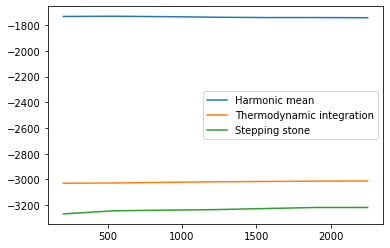

In [73]:
#plt.plot(np.linspace(burnin, n_gibbs_iter*sampler.n_iter, 7, dtype=int), log_z_avgs, label='Arithmetic mean')
plt.plot(np.linspace(burnin, n_gibbs_iter*sampler.n_iter, 7, dtype=int), log_z_hmeans, label='Harmonic mean')
plt.plot(np.linspace(burnin, n_gibbs_iter*sampler.n_iter, 7, dtype=int), log_z_thints, label='Thermodynamic integration')
plt.plot(np.linspace(burnin, n_gibbs_iter*sampler.n_iter, 7, dtype=int), log_z_stones, label='Stepping stone')
plt.legend()


In [68]:
import numpy as np
BF=np.load('./data/Bayes_factor.npy')
BF_err=np.load('./data/Bayes_error.npy')

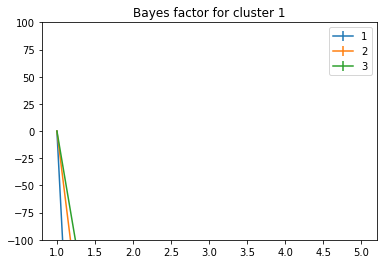

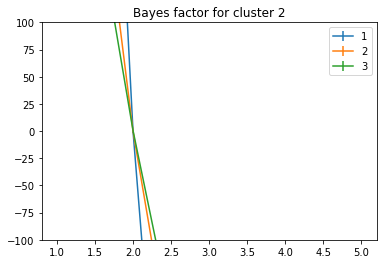

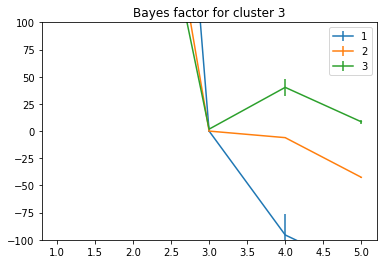

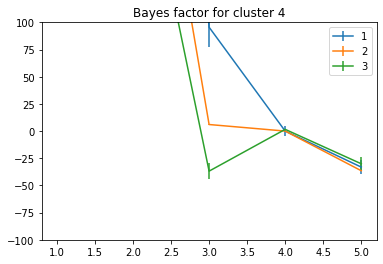

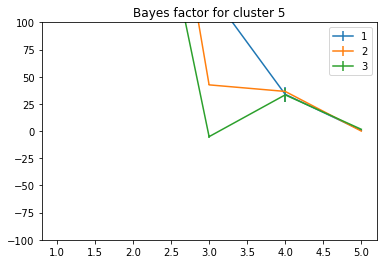

In [91]:
for j in range(5):
    for i in range(1,4):
        plt.errorbar([1,2,3,4,5], BF[i,j], yerr=0.1*BF_err[i,j], label=i)
    plt.legend()
    plt.title('Bayes factor for cluster %d'%(j+1))
    plt.ylim(-100,100)
    plt.show()

In [80]:
BF[2], BF_err[2]

(array([[    0.        ,  -562.64722283,  -973.61906736,  -979.6535093 ,
         -1016.12989556],
        [  562.64722283,     0.        ,  -410.97184453,  -417.00628648,
          -453.48267273],
        [  973.61906736,   410.97184453,     0.        ,    -6.03444195,
           -42.5108282 ],
        [  979.6535093 ,   417.00628648,     6.03444195,     0.        ,
           -36.47638625],
        [ 1016.12989556,   453.48267273,    42.5108282 ,    36.47638625,
             0.        ]]),
 array([[1.20387075, 1.44135798, 2.71724459, 1.42885667, 2.30005808],
        [1.44135798, 1.67884522, 2.95473182, 1.66634391, 2.53754531],
        [2.71724459, 2.95473182, 4.23061843, 2.94223051, 3.81343192],
        [1.42885667, 1.66634391, 2.94223051, 1.65384259, 2.525044  ],
        [2.30005808, 2.53754531, 3.81343192, 2.525044  , 3.39624541]]))

In [84]:
BF[3], BF_err[3]

(array([[ 1.40171833e-02, -4.12892299e+02, -7.50982551e+02,
         -7.12558420e+02, -7.44221087e+02],
        [ 4.13460294e+02,  5.53977799e-01, -3.37536274e+02,
         -2.99112143e+02, -3.30774809e+02],
        [ 7.52779434e+02,  3.39873117e+02,  1.78286545e+00,
          4.02069964e+01,  8.54432999e+00],
        [ 7.14157168e+02,  3.01250852e+02, -3.68393999e+01,
          1.58473107e+00, -3.00779354e+01],
        [ 7.45873379e+02,  3.32967062e+02, -5.12318936e+00,
          3.33009416e+01,  1.63827518e+00]]),
 array([[-3.56730736e+00, -8.27174550e+02, -1.50392923e+03,
         -1.42692735e+03, -1.49029311e+03],
        [ 8.26610559e+02,  3.92260012e-01, -6.76900090e+02,
         -5.99863756e+02, -6.63239704e+02],
        [ 1.50713244e+03,  6.80376468e+02,  2.29190274e+00,
          7.94221025e+01,  1.60196319e+01],
        [ 1.42964525e+03,  6.02923740e+02, -7.50669589e+01,
          2.04846141e+00, -6.13499510e+01],
        [ 1.49314433e+03,  6.66412635e+02, -1.16045874e+01,
  